## 画像工学特論課題 4
### 正規乱数
<div style="text-align: right"> エネルギー環境システム専攻修士課程1年 26213167 </div>
<div style="text-align: right"> 和田拓弥 </div>

#### 1. 一様乱数を用いて平均が0，標準偏差が10の正規乱数を生成するプログラムを作成しなさい．

PythonのライブラリであるNumpyには，一様乱数を生成できる関数が存在する．

`numpy.random.rand()`

この関数を用いることで一様乱数 $X_u\sim U[0, 1]$ を取得することができる．今回はこちらで生成した一様乱数を用いて以下の3種類の方法で正規乱数を生成した．

- 一様乱数の和による乱数の生成
- 座標変換による任意の確率分布
- Box-Muller法による正規乱数

In [1]:
# import library
from matplotlib import pyplot as plt
import numpy as np
from scipy import special as sp
import time

# set seed
np.random.seed(seed=0)

##### 一様乱数の和による乱数の生成

$X_u\sim U[0, 1]$ について

$$
\overline{x_u} = \int_{0}^{1}x_u dx_u = \frac{1}{2}\\
\sigma^2_{x_u} = \int_{0}^{1}(x_u - \overline{x_u})^2 dx_u = \overline{{x_u}^2} - \overline{x_u}^2 = \frac{1}{12}
$$

また，$X = \sum_{n=1}^{N}X_u$ について

$$
\overline{x} = \sum_{n=1}^{N}\overline{x_u} = \frac{N}{2}\\
\sigma^2_{x} = \sum_{n=1}^{N}\sigma^2_{x_u} = \frac{N}{12}
$$

中心極限定理より，独立な同一の分布に従う確率変数の算術和は，正規分布に収束するため，$X\sim N[\bar{x}, \sigma_{x}^2]$ である．平均が0，標準偏差が10の正規乱数を取得するには $N = 1200$ として，もとめた $X$ を0となるようにシフトさせれば良い．

$$
N[0, 10^2] = \sum_{n=1}^{1200}X_{u} - 600
$$

In [2]:
def randn_1(mu, sigma):
    rn = 0

    for i in range(12*sigma**2):
        rn += np.random.rand()

    return rn - 6 * sigma**2 + mu

##### 座標変換による任意の確率分布

$N[\mu, \sigma^2]$ を $p_y(y)$ とする．すなわち

$$
p_y(y) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y-\mu)^2}{2\sigma^2}}
$$

これの逆変換を求めればよく，

$$
x =　\frac{1}{\sqrt{2\pi}\sigma}\int e^{-\frac{(y - \mu)^2}{2\sigma^2}}dy = \frac{1}{2}\lbrace1+\mathrm{erf}(\frac{y - \mu}{\sqrt{2}\sigma})\rbrace\\
\to y = \mu + \sqrt{2}\sigma\,\mathrm{erf}^{-1}(2x - 1)
$$

本来誤差逆関数は用意には求められないが，PythonのライブラリであるScipyには，これをもとめる関数`scipy.special.erfinv()`が存在するため，これを利用する．

In [3]:
def randn_2(mu, sigma):
    return mu + np.sqrt(2) * sigma * sp.erfinv(2 * np.random.rand() - 1)

##### Box-Muller法による正規乱数

$x_1, x_2$ を独立な$U[0, 1]$ の一様乱数とする．このとき以下に示す変換式により求まる$y_1, y_2$ は $N[0, 1]$ の正規分布乱数となる．

$$
y_1 = \sqrt{-2\log{x_1}}\cos(2\pi x_2)\\
y_2 = \sqrt{-2\log{x_1}}\sin(2\pi x_2)
$$

これにより得られる $N[0, 1]$ を規格化の式で逆変換することで，任意の平均$\mu$，分散 $\sigma^2$ をもつ正規分布乱数を取得する．

$$
Y = \frac{X - \mu}{\sigma}\\
\rightarrow X = \sigma Y + \mu
$$

In [4]:
def randn_3(mu, sigma):
    x1 = np.random.rand()
    x2 = np.random.rand()

    y1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x2)
    y2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * np.pi * x2)

    return mu + sigma * y1, mu + sigma * y2

#### 2. 作成したプログラムにより10000個の乱数を発生し，その度数分布を図示しなさい．

10000個の乱数を上記3種類の方法で生成させた結果を以下の図1に示す．

In [5]:
# generate randn
randn1 = [randn_1(mu=0, sigma=10) for _ in range(10000)]
randn2 = [randn_2(mu=0, sigma=10) for _ in range(10000)]
randn3 = [randn_3(mu=0, sigma=10)[0] for _ in range(10000)]

In [6]:
# set normal distribution
x = np.linspace(-50, 50, 10000)
y = 1 / 10 / np.sqrt(2 * np.pi) * np.exp(-1 / 2 * (x / 10)**2)

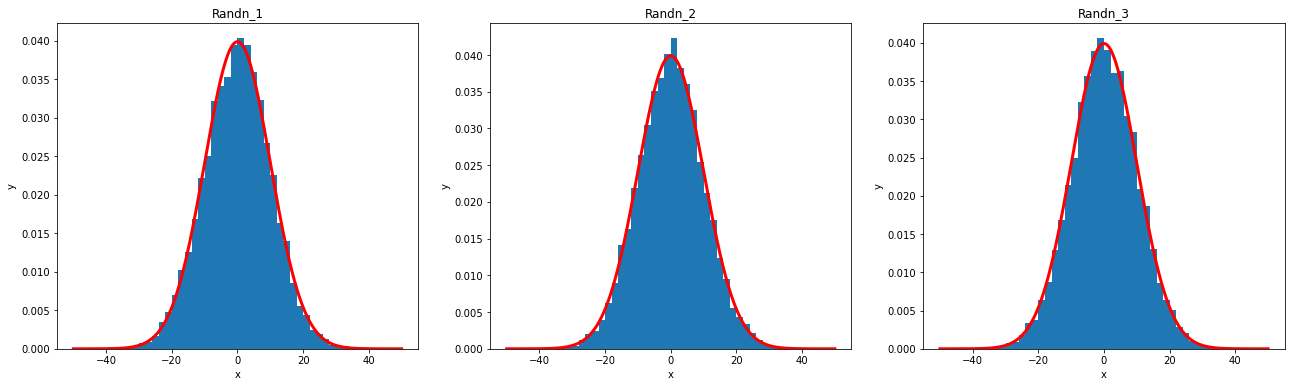

In [7]:
# show results
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(22.0, 6.0))
plt.subplots_adjust(wspace=0.2)

axes[0].set_title("Randn_1")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].set_title("Randn_2")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

axes[2].set_title("Randn_3")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")

axes[0].hist(randn1, bins=50, range=(-50, 50), density=True)
axes[1].hist(randn2, bins=50, range=(-50, 50), density=True)
axes[2].hist(randn3, bins=50, range=(-50, 50), density=True)

axes[0].plot(x, y, c='r', linewidth=3)
axes[1].plot(x, y, c='r', linewidth=3)
axes[2].plot(x, y, c='r', linewidth=3)

plt.show()

青は各関数で生成させた乱数のヒストグラムであり，赤は正規分布を示している．なおヒストグラムは面積の合計が1になるよう規格化した結果を示している．各結果にばらつきはあるものの，おおよそ正規分布に従った結果が得られた．

ここでパフォーマンスの比較について，演算処理に要する時間についても考える．

In [8]:
start = time.time()
_ = [randn_1(mu=0, sigma=10) for _ in range(10000)]
p_time = time.time() - start

print (f"{p_time:.4f} [sec]")

3.6319 [sec]


In [9]:
start = time.time()
_ = [randn_2(mu=0, sigma=10) for _ in range(10000)]
p_time = time.time() - start

print (f"{p_time:.4f} [sec]")

0.0223 [sec]


In [10]:
start = time.time()
_ = [randn_3(mu=0, sigma=10) for _ in range(10000)]
p_time = time.time() - start

print (f"{p_time:.4f} [sec]")

0.0609 [sec]


結果から「座標変換による任意の確率分布」の方法が一番処理時間を要しないことが分かった．ここで「一様乱数の和による乱数の生成」に，多くの処理時間を要した原因について，一回生成するごとにループが生じるため処理負荷が増大してしまった事が考えられる．

#### 3. 乱数の発生個数Nを変えながら，その平均と標準偏差の変化を図示しなさい．

ここからは「座標変換による任意の確率分布」によって生成される乱数について扱うものとする．生成個数を $N = 10^1, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8$ と変化させ，生成させた乱数の平均及び標準偏差の設定値からの差が，それぞれどのように変化するかを調べる．

In [11]:
# generate randn & calc diff
n_list = []
mu_diff = []
sg_diff = []

for n in range(1, 9):
    n_list.append(10**n)
    mu_diff.append(np.abs(np.mean([randn_2(mu=0, sigma=10) for _ in range(10**n)])))
    sg_diff.append(np.abs(10 - np.std([randn_2(mu=0, sigma=10) for _ in range(10**n)])))

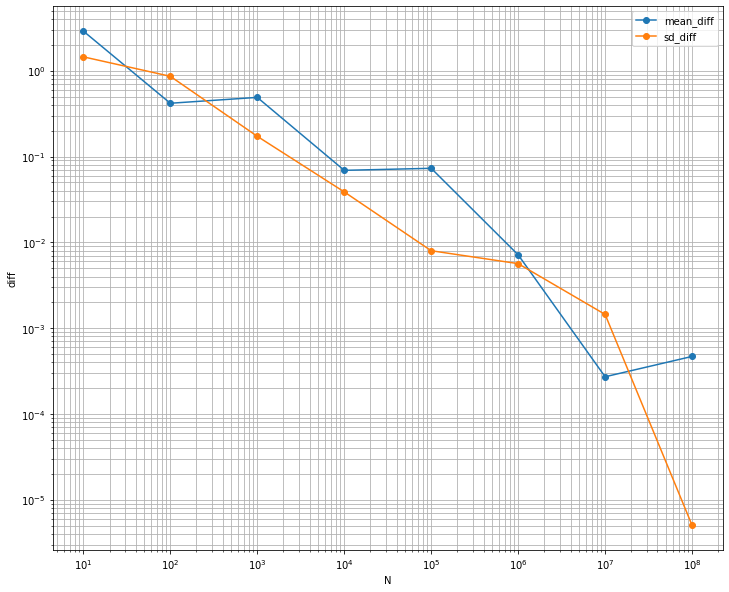

In [12]:
# show results
fig, ax = plt.subplots(figsize=(12, 10))

ax.set_xlabel("N")
ax.set_ylabel("diff")
ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(n_list, mu_diff, marker="o", label="mean_diff")
plt.plot(n_list, sg_diff, marker="o", label="sd_diff")

plt.grid(which="both")
plt.legend(loc='upper right')

plt.show()

上図は生成させた乱数の平均及び標準偏差の設定値からの差についてをそれぞれ両対数グラフで示したものである．結果から生成個数の増加に伴い，設定値との差が小さくなることがグラフから明らかである．またこの減少傾向は指数的に変化することが読み取れ，平均及び標準偏差は同程度の変化量で設定値に近づいていく様子が明らかとなった．
